In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
for dir_name, _ , file_names in os.walk('/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1'):
    for file_name in file_names:
        print(os.path.join(dir_name, file_name))

/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/main.ipynb
/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/ca_test.csv
/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/ca_submission.csv
/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/ca_train.csv
/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/.ipynb_checkpoints/main-checkpoint.ipynb


### Evaluation
Submissions are evaluated using the column-wise root mean squared logarithmic error.

The RMSLE for a single column calculated as

where:

$\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$

$n$ is the total number of observations <br>
$p_i$ is your prediction<br>
$a_i$ is the actual value<br>
$log(x)$ is the natural logarithm of $x$ <br>
<br>

The final score is the mean of the RMSLE over all columns (in this case, 2).

In [11]:
%ls

Untitled.ipynb     ca_submission.csv  ca_test.csv        ca_train.csv


In [45]:
train_path = '/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/ca_train.csv'
test_path = '/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/ca_test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv('/Users/gtien/Projects/covid19-local-us-ca-forecasting-week-1/ca_submission.csv')

In [8]:
train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,63.000000,6.300000e+01,6.300000e+01,63.000000,63.000000
mean,32.000000,3.611620e+01,-1.196816e+02,212.333333,3.809524
std,18.330303,2.148750e-14,1.002750e-13,519.490725,9.758135
min,1.000000,3.611620e+01,-1.196816e+02,0.000000,0.000000
25%,16.500000,3.611620e+01,-1.196816e+02,0.000000,0.000000
50%,32.000000,3.611620e+01,-1.196816e+02,0.000000,0.000000
75%,47.500000,3.611620e+01,-1.196816e+02,0.000000,0.000000
max,63.000000,3.611620e+01,-1.196816e+02,2538.000000,50.000000


In [20]:
df = train.copy()

In [21]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


In [46]:
train['Date'] = pd.to_datetime(train['Date']).apply(lambda x: x.date().strftime('%m-%d'))
test['Date'] = pd.to_datetime(test['Date']).apply(lambda x: x.date().strftime('%m-%d'))

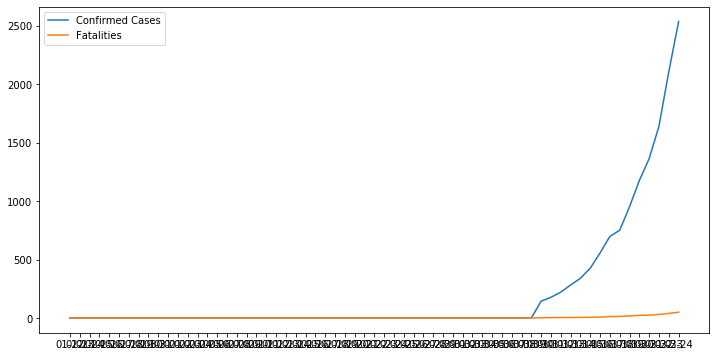

In [36]:
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['ConfirmedCases'], label='Confirmed Cases')
plt.plot(train['Date'], train['Fatalities'], label='Fatalities')
plt.legend()
plt.show()

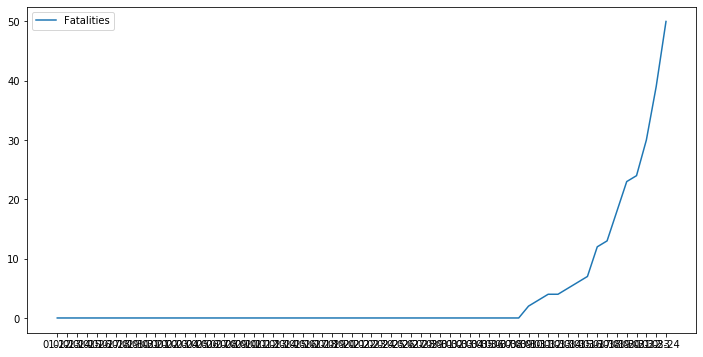

In [37]:
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['Fatalities'], label = 'Fatalities')
plt.legend()
plt.show()

### Data Cleaning

In [52]:
# ignore first 48 days due to 0 cases and fatalities
df = train[48:]

# Match the test ForecastId to train Id's
test = test[['ForecastId']]+50
X_train = df[['Id']]
y_con = df[['ConfirmedCases']]
y_fat = df[['Fatalities']]


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, LinearRegression
poly = PolynomialFeatures(6)
X = poly.fit_transform(X_train)
X_test = poly.fit_transform(test)

## Model

In [50]:
X_test.head()

,ForecastId
0,51
1,52
2,53
3,54
4,55
